In [17]:
# NN: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
# https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

# we are predicting BIRTH WEIGHT (DBWT)

# Setup and imports

import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# CROP DOWN THE DATA FOR TESTING...
from numpy.random import RandomState
rng = RandomState()

train = pd.read_csv("../../data/fetal_health_train.csv").sample(frac=1, random_state=rng)
print(train.shape)
test = pd.read_csv("../../data/fetal_health_test.csv").sample(frac=1, random_state=rng)
print(test.shape)

num_attributes = train.shape[1] - 1 # num attributes is #cols - 1 (for the result)

(1701, 22)
(425, 22)


In [18]:
# Seperate test/train data into X and y (input and output)
X_train = train.drop('fetal_health', axis=1) 
y_train = train['fetal_health']
X_test = test.drop('fetal_health', axis=1)
y_test = test['fetal_health']

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [19]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=num_attributes, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MSE'])
    return model

In [20]:
# define a DEEPER model
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=num_attributes, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MSE'])
    return model

In [21]:
# define a WIDER model
def wider_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=num_attributes, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MSE'])
    return model

In [22]:
# training the model
model = baseline_model()
neural_net = model.fit(X_train, y_train, epochs=10, batch_size=5, verbose=1)

Epoch 1/10
1701/1701 [==============================] - 0s 189us/step - loss: 0.8892 - MSE: 0.8892
Epoch 2/10
1701/1701 [==============================] - 0s 139us/step - loss: 0.1689 - MSE: 0.1689
Epoch 3/10
1701/1701 [==============================] - 0s 187us/step - loss: 0.1372 - MSE: 0.1372
Epoch 4/10
1701/1701 [==============================] - 0s 233us/step - loss: 0.1246 - MSE: 0.1246
Epoch 5/10
1701/1701 [==============================] - 0s 225us/step - loss: 0.1180 - MSE: 0.1180
Epoch 6/10
1701/1701 [==============================] - 0s 225us/step - loss: 0.1140 - MSE: 0.1140
Epoch 7/10
1701/1701 [==============================] - 0s 187us/step - loss: 0.1107 - MSE: 0.1107
Epoch 8/10
1701/1701 [==============================] - 0s 159us/step - loss: 0.1091 - MSE: 0.1091
Epoch 9/10
1701/1701 [==============================] - 0s 195us/step - loss: 0.1052 - MSE: 0.1052
Epoch 10/10
1701/1701 [==============================] - 0s 147us/step - loss: 0.1041 - MSE: 0.1041


In [23]:
# predict
y_pred = model.predict(X_test)

Mean Absolute Error: 0.23645442303489236
Mean Squared Error: 0.1265257879306703
Root Mean Squared Error: 0.35570463580148953
R Squared: 0.6531850120648093


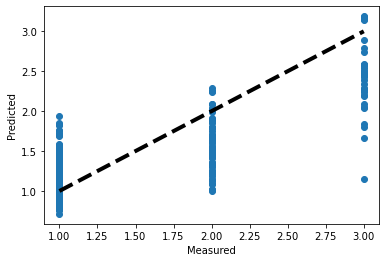

In [24]:
# get some metrics
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared:', metrics.r2_score(y_test, y_pred))

# plot predictions vs expected
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()